In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from matplotlib import animation
from IPython.display import HTML
from scipy import stats
import csv
import math
import sys

csv.field_size_limit(sys.maxint)

131072

In [6]:
# Load data from netlogo's behaviorspace "spreadsheet" output
# ** DIFFERENT THAN THE LOADERS IN OTHER NOTEBOOKS: needs to parse netlogo array
def loadBehaviorspaceAsStrings(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = _data[i][j]
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=str)
    print "Keys:"
    print data.keys()
    return (metadata, data)

def parseNetlogoArray(s):
    return eval(s.replace(' ', ', '))


def toNetlogoArray(arr):
    return "[" + " ".join(map(str, arr)) + "]"

def toNetlogoArray2d(arr):
    return toNetlogoArray([toNetlogoArray(i) for i in arr])
    return "[" + " ".join(map(str, arr)) + "]"




In [7]:

#metadata,alldata = loadBehaviorspaceAsStrings("./behaviorspace_data/mh-weightedmem-keepmutations.csv")
#metadata,alldata = loadBehaviorspaceAsStrings("./behaviorspace_data/tues-night-bigrun.csv")
metadata,alldata = loadBehaviorspaceAsStrings("./behaviorspace_data/bigrun-weds-day.csv")

for i in zip(
    range(len(alldata)),
    alldata['[run number]'],
    alldata['keep-mutations'],
    alldata['N'],
    alldata['tau'], 
    alldata['the-seed'],
): print i

# tues-night-bigrun.csv

Keys:
['Ng', 'tau', 'mutation-history', 'keep-mutations', 'num-variants', 'the-seed', 'percent-to-replace', '[step]', 'N', 'p', 'num-param-pop-mutations', '[run number]', 'mem-size', 'mutation-magnitude', 'mutation-probability', 'mutation-magnitude-sp']
(0, '8', '2', '10', '1', '2345')
(1, '2', '2', '10', '0', '2345')
(2, '7', '0', '10', '1', '2345')
(3, '5', '0', '10', '0.67', '2345')
(4, '6', '2', '10', '0.67', '2345')
(5, '4', '2', '10', '0.33', '2345')
(6, '3', '0', '10', '0.33', '2345')
(7, '1', '0', '10', '0', '2345')
(8, '14', '2', '50', '0.67', '2345')
(9, '9', '0', '50', '0', '2345')
(10, '15', '0', '50', '1', '2345')
(11, '11', '0', '50', '0.33', '2345')
(12, '10', '2', '50', '0', '2345')
(13, '12', '2', '50', '0.33', '2345')
(14, '13', '0', '50', '0.67', '2345')
(15, '16', '2', '50', '1', '2345')


In [113]:
km_mask = [km == '0' for km in alldata['keep-mutations']]

In [89]:
zip(range(len(alldata)),
    alldata['the-seed'],
    alldata['N'],
    alldata['tau'], 
    alldata['mutation-magnitude'], 
)

[(0, '2345', '10', '1', '0.4'),
 (1, '2345', '10', '0', '0.4'),
 (2, '2345', '10', '1', '0.4'),
 (3, '2345', '10', '0.67', '0.4'),
 (4, '2345', '10', '0.67', '0.4'),
 (5, '2345', '10', '0.33', '0.4'),
 (6, '2345', '10', '0.33', '0.4'),
 (7, '2345', '10', '0', '0.4'),
 (8, '2345', '50', '0.67', '0.4'),
 (9, '2345', '50', '0', '0.4'),
 (10, '2345', '50', '1', '0.4'),
 (11, '2345', '50', '0.33', '0.4'),
 (12, '2345', '50', '0', '0.4'),
 (13, '2345', '50', '0.33', '0.4'),
 (14, '2345', '50', '0.67', '0.4'),
 (15, '2345', '50', '1', '0.4')]

In [93]:
out = alldata['mutation-history'][15]
data15 = eval(", ".join(out.split(" ")))
#data = [[data[i][0], math.floor(i/3), data[i][1]] for i in range(len(data))]

In [96]:
len(data15[999][3])


50

In [114]:
FuncAnimationtau_mask = [tau == '0' for tau in alldata['tau']]
#seed_mask = [tau == '2345' for tau in alldata['the-seed']]
#mask = np.extract(seed_mask, tau_mask)

mask = tau_mask
#out = np.extract(mask,alldata['mutation-history'])[9]
out = alldata['mutation-history'][9]
data = eval(", ".join(out.split(" ")))


'''
tau_mask = [tau == '0.5' for tau in alldata['tau']]
out = np.extract(tau_mask,alldata['mutation-history'])[0]
data_05 = eval(", ".join(out.split(" ")))

tau_mask = [tau == '1' for tau in alldata['tau']]
out = np.extract(tau_mask,alldata['mutation-history'])[0]
data_1 = eval(", ".join(out.split(" ")))
'''

'\ntau_mask = [tau == \'0.5\' for tau in alldata[\'tau\']]\nout = np.extract(tau_mask,alldata[\'mutation-history\'])[0]\ndata_05 = eval(", ".join(out.split(" ")))\n\ntau_mask = [tau == \'1\' for tau in alldata[\'tau\']]\nout = np.extract(tau_mask,alldata[\'mutation-history\'])[0]\ndata_1 = eval(", ".join(out.split(" ")))\n'

In [8]:
parsed_data = [eval(", ".join(alldata['mutation-history'][i].split(" "))) for i in range(len(alldata['mutation-history']))]
tau_runs = {0.:9, 0.33:11, 0.66: 14, 1.0:10}

In [9]:
def showGenerations(data):
    num_mutations = 5
    num_generations = len(data) / num_mutations

    generation_skip = 10

    ncols = num_mutations
    nrows = 1 + num_generations / generation_skip

    size = (2,2)
    plt.figure(figsize=(size[0]*ncols, size[1]*nrows))
    plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)
    subplot_index = 0

    for i in range(len(data)):
        fitness = data[i][0]
        generation = data[i][1]
        wealths = np.array(data[i][2])
        population = data[i][3]

        if generation % generation_skip != 0: continue

        B = np.array([params[0] for params in population])
        X = np.array([params[1] for params in population])
        R = np.array([params[2] for params in population])
        H = np.array([params[3] for params in population])


        subplot_index += 1
        plt.subplot(nrows, ncols, subplot_index)
        plt.scatter(B, X, c=plt.cm.plasma((X)), alpha=0.8, s=(wealths/5 - 10))
        plt.xlim(0, 1.05)
        plt.ylim(0, 1.05)

        label = str(int(fitness)) + "\n" + str(generation) + "\n" + str(i)
        plt.text(1, 1, label, va="top", ha="right")

    plt.show()
showgenerations(data)

NameError: name 'showgenerations' is not defined

In [19]:
def showGens(data, generation_skip=50):
    num_mutations = 5
    num_generations = len(data) / num_mutations


    ncols = num_mutations
    nrows = 1 + num_generations / generation_skip

    size = (2,2)
    #plt.figure(figsize=(size[0]*ncols, size[1]*nrows))
    #plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)
    #subplot_index = 0

    for i in range(len(data)):
        fitness = data[i][0]
        generation = data[i][1]
        wealths = np.array(data[i][2])
        population = data[i][3]

        if i % (generation_skip * num_mutations) != 0: continue
        
        print"Generation", generation
        showOne(data, i, show_details=False)

#showGens(parsed_data[tau_runs[0]], generation_skip=50)

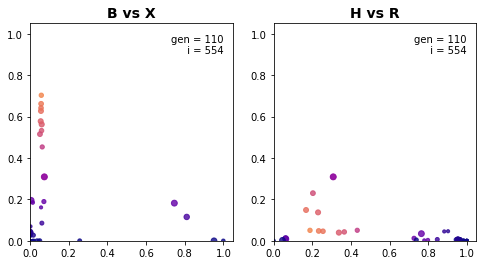

Fitness 5445.13718761
Wealth 6565.0
Gini index 0.170580778734


In [17]:
def showOne(data, i, show_details=True):

    size = (8,4)
    fig = plt.figure(figsize=size)
    #plt.figure(figsize=(size[0]*ncols, size[1]*nrows))
    #plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)
    #subplot_index = 0
    fitness = data[i][0]
    generation = data[i][1]
    wealths = np.array(data[i][2])
    population = data[i][3]


    B = np.array([params[0] for params in population])
    X = np.array([params[1] for params in population])
    R = np.array([params[2] for params in population])
    H = np.array([params[3] for params in population])
    
    ax = fig.add_subplot('121')
    ax.set_title('B vs X', fontsize=14, fontweight='bold')

    plt.scatter(B, X, c=plt.cm.plasma((X)), alpha=0.8, s=(wealths/5 - 10))
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    label = "gen = " + str(generation) + "\n i = " + str(i)
    plt.text(1, 1, label, va="top", ha="right")
    
    ax = fig.add_subplot('122')
    ax.set_title('H vs R', fontsize=14, fontweight='bold')

    plt.scatter(R, H, c=plt.cm.plasma((X)), alpha=0.8, s=(wealths/5 - 10))
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    label = "gen = " + str(generation) + "\n i = " + str(i)
    plt.text(1, 1, label, va="top", ha="right")
    plt.show()
    
    if show_details:
        print "Fitness", data[i][0]
        print "Wealth", sum(data[i][2])
        print "Gini index", 1 -  data[i][0]/sum(data[i][2])

showOne(parsed_data[tau_runs[0]], 554)

In [12]:
def showVector(V):
    
    size = (8,4)
    fig = plt.figure(figsize=size)

    ax = fig.add_subplot('121')
    ax.set_title('B vs X', fontsize=14, fontweight='bold')

    plt.scatter([V[0]], [V[1]])
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    
    ax = fig.add_subplot('122')
    ax.set_title('H vs R', fontsize=14, fontweight='bold')

    plt.scatter([V[2]], [V[3]])
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.show()

In [301]:
data[9][0]

5458.149602827739

In [ ]:
def animateGens3D(data):

    def update_graph(num):
        i = num * 3
        fitness = data[i][0]
        generation = data[i][1]
        wealths = data[i][2]
        population = data[i][3]
        B = np.array([params[0] for params in population])
        X = np.array([params[1] for params in population])
        R = np.array([params[2] for params in population])
        H = np.array([params[3] for params in population])
        graph.set_data (R, H)
        graph.set_3d_properties(B)
        #graph.axes.view_init(30, num) # for rotating
        title.set_text('generation={}'.format(num))
        return title, graph, 


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    title = ax.set_title('', fontsize=14, fontweight='bold')

    graph, = ax.plot([], [], [], linestyle="", marker="o")

    return animation.FuncAnimation(fig, update_graph, 83, 
                                   interval=100, blit=True, repeat=False)


def animateGens(data):

    def update_graph(num):
        i = num * 3
        fitness = data[i][0]
        generation = data[i][1]
        wealths = data[i][2]
        population = data[i][3]
        B = np.array([params[0] for params in population])
        X = np.array([params[1] for params in population])
        R = np.array([params[2] for params in population])
        H = np.array([params[3] for params in population])
        graph.set_data (R, H)
        graph.set_3d_properties(B)
        #graph.axes.view_init(30, num) # for rotating
        title.set_text('generation={}'.format(num))
        return title, graph, 
    
    
    
    
    size = (8,4)
    fig = plt.figure(figsize=size)
    #plt.figure(figsize=(size[0]*ncols, size[1]*nrows))
    #plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)
    #subplot_index = 0
    fitness = data[i][0]
    generation = data[i][1]
    wealths = np.array(data[i][2])
    population = data[i][3]


    B = np.array([params[0] for params in population])
    X = np.array([params[1] for params in population])
    R = np.array([params[2] for params in population])
    H = np.array([params[3] for params in population])
    
    ax = fig.add_subplot('121')
    ax.set_title('B vs X', fontsize=14, fontweight='bold')

    plt.scatter(B, X, c=plt.cm.plasma((X)), alpha=0.8, s=(wealths/5 - 10))
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    label = "gen = " + str(generation) + "\n i = " + str(i)
    plt.text(1, 1, label, va="top", ha="right")
    
    ax = fig.add_subplot('122')
    ax.set_title('H vs R', fontsize=14, fontweight='bold')

    plt.scatter(R, H, c=plt.cm.plasma((X)), alpha=0.8, s=(wealths/5 - 10))
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    label = "gen = " + str(generation) + "\n i = " + str(i)
    plt.text(1, 1, label, va="top", ha="right")
    plt.show()
    
    


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    title = ax.set_title('', fontsize=14, fontweight='bold')

    graph, = ax.plot([], [], [], linestyle="", marker="o")

    return animation.FuncAnimation(fig, update_graph, 83, 
                                   interval=100, blit=True, repeat=False)

a = animateGens(parsed_data[tau_runs[0]])
HTML(a.to_html5_video())


In [379]:
num_mutations = 5
NCURVES = 10
np.random.seed(101)
curves = [np.random.random(20) for i in range(NCURVES)]
values = range(NCURVES)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

class GenerationAnimation(animation.TimedAnimation):
    def __init__(self, data):
        self.data = data
        size = (8,4)
        self.fig = plt.figure(figsize=size)
        self.ax1 = self.fig.add_subplot(1, 2, 1)
        self.ax2 = self.fig.add_subplot(1, 2, 2)
        animation.TimedAnimation.__init__(self, self.fig, interval=50, blit=True, repeat=False)
        
        self.vals = range(len(self.data) / num_mutations)


    def _draw_frame(self, framedata):
        i = framedata * num_mutations
        
        fitness = self.data[i][0]
        generation = self.data[i][1]
        wealths = np.array(self.data[i][2])
        population = self.data[i][3]
        B = np.array([params[0] for params in population])
        X = np.array([params[1] for params in population])
        R = np.array([params[2] for params in population])
        H = np.array([params[3] for params in population])
        
        self.plt1[0].set_data(X, B)
        self.plt2[0].set_data(R, H)
        #c=, alpha=0.8, s=(wealths/5 - 10))
        #self.plt1[0].set_color(plt.cm.plasma((X)))
        self.title.set_text('generation={}'.format(generation))

    def new_frame_seq(self):
        return iter(range(len(self.data) / num_mutations))

    def _init_draw(self):
        
        self.title = plt.suptitle('test', fontsize=16, fontweight='bold')
        self.ax1.set_title('X vs B', fontsize=14, fontweight='bold')
        self.plt1 = self.ax1.plot([], [], linestyle="", marker="o", color='black')
        self.ax1.set_xlim(0, 1.05)
        self.ax1.set_ylim(0, 1.05)

        self.ax2.set_title('R vs H', fontsize=14, fontweight='bold')
        self.plt2 = self.ax2.plot([], [], linestyle="", marker="o", color='black')
        self.ax2.set_xlim(0, 1.05)
        self.ax2.set_ylim(0, 1.05)
        
        
        


In [ ]:

def plotWealthVsGen(data, title):
    plt.figure(figsize=(4.5, 3))
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("generation")
    plt.ylabel("wealth")

    fitness = np.array([d[0] for d in data])
    generation = np.array([d[1] for d in data])
    wealth = np.array([sum(d[2]) for d in data])
    gini = 1 - (fitness / wealth)
    
    X = generation
    Y = wealth
    C = gini
    plt.scatter(X, Y, c=plt.cm.plasma(plt.Normalize()(C)), alpha=0.5, s=10)
    #plt.ylim(0, 0.5)
    #plt.xlim(0, 8000)

    # linear regression
    #slope, intercept, r_value, p_value, std_err = stats.linregress(generation, Y)
    #plt.plot(generation, intercept + slope*generation, 'r', label='fitted line')
    
    plt.show()

In [ ]:
# [(gen, wealth) .. ] sum(d[2])
#xy = zip(*[(d[1], d[0]) for d in data])

def plotGiniVsWealth(data, title, extra=None):
    plt.figure(figsize=(4.5, 3))
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("wealth")
    plt.ylabel("gini index")
    
    if extra is not None:
        extra()
        
    

    fitness = np.array([d[0] for d in data])
    generation = np.array([d[1] for d in data])
    wealth = np.array([sum(d[2]) for d in data])
    
    gini = 1 - (fitness / wealth)
    
    X = wealth
    Y = gini
    C = generation
    plt.scatter(X, Y, c=plt.cm.winter(1-plt.Normalize()(C)), alpha=0.5, s=10)
    plt.ylim(0, 0.5)
    plt.xlim(0, 8000)

    # linear regression
    #slope, intercept, r_value, p_value, std_err = stats.linregress(generation, Y)
    #plt.plot(generation, intercept + slope*generation, 'r', label='fitted line')
    
    plt.show()
    
#plotGiniVsWealth(parsed_data[tau_runs[0.33]], "tau = " + str(0.33), arrow((7000, 0.05), (6200, 0.08), 'red'))

In [ ]:
def arrow(a, b, color):
    return lambda: plt.annotate('', xytext=a, xy=b, arrowprops=dict(facecolor=color, lw=0.1))

# Spring 2018 Complexity Challenge!



### The System

* 50 agents playing a 100-round investing game.
* On each round, agents use any strategy to move to one of three pools.
* Agents pay a tax of *tau* to switch pools.

### Pool Payoffs

* **Stable**: \$1 per agent.
* **Low**: 50% chance to generate \$40, then split evenly among agents.
* **High**: 25% chance to generate \$80, then split evenly among agents.






![](http://i.imgur.com/hL7dw4D.png)

# Using a Genetic Algorithm to traverse the strategy space

* Use the GA to reach combinations of strategies that I might not have thought of otherwise.
* Use it to find areas of the strategy space with higher and more evenly distributed wealth.

# Four strategies

**Strategy X:** Move randomly.

**Strategy B:** Move according to a bias.

**Strategy R:** Move according to a simple risk profile:

* Stable if my wealth is under the median; 
* Low if my wealth is between the 50th and 75th percentiles;
* High if my wealth is over the 75th percentile.

*Note: this violates the game rules, since it needs to consider the distribution of wealth!*

**Strategy H:** Predict the next turn based on the last 4 turns, then move to the best pool.

# 1 agent = 1 strategy vector

$\hspace{30px}\begin{bmatrix}
    P_{X} \\
    P_{B} \\
    P_{R} \\
    P_{H}
\end{bmatrix}$


# Example:

$\hspace{30px}\begin{bmatrix}
    P_{X} \\
    P_{B} \\
    P_{R} \\
    P_{H}
\end{bmatrix} = \begin{bmatrix}
    0 \\
    0 \\
    0.5 \\
    0.5
\end{bmatrix}$

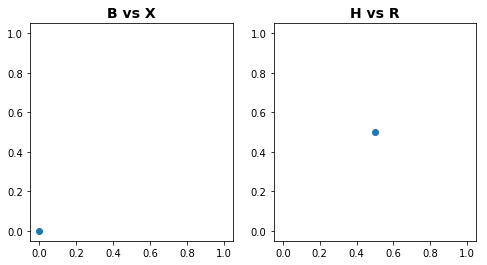

In [14]:
showVector([0, 0, 0.5, 0.5])

# A population of strategies

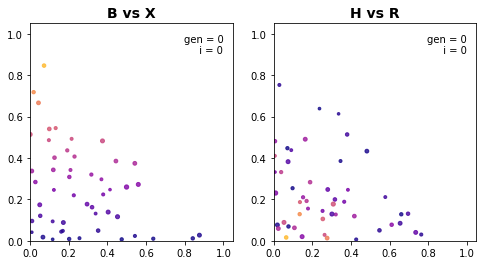

Fitness 5057.2993062
Wealth 5470.0
Gini index 0.0754480244612


In [383]:
showOne(data, 0)

# Iterate!

Generation 0


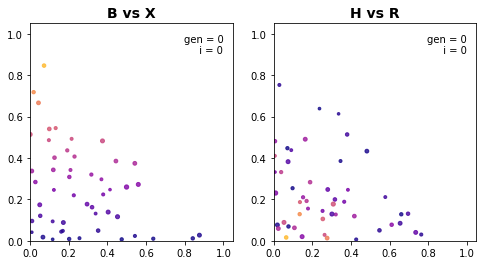

Generation 40


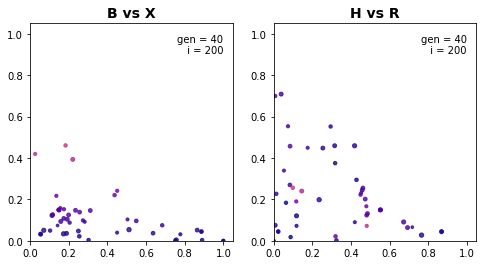

Generation 80


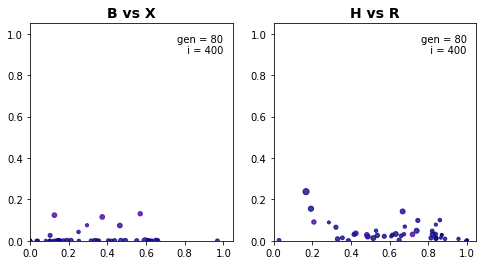

Generation 120


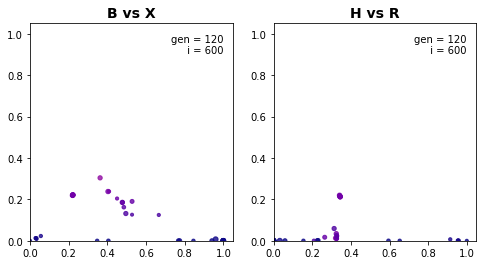

Generation 160


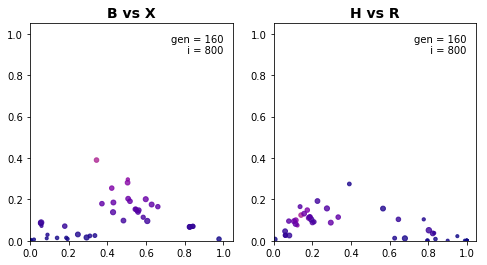

In [20]:
showGens(parsed_data[tau_runs[0]], generation_skip=40)

# Population Fitness

Aiming for high wealth and balanced/equitable distribution of wealth.

#### Fitness $  = W * (1 - G) $

#### Gini Index = $ G = \frac{1 }{2 N^2 \mu}\sum\limits_{i=1}^{N} \sum\limits_{j=1}^{N} \left| w_i - w_j \right|$, $\hspace{20px}w_i =$ wealth of $i$th agent, $\mu = $ mean wealth

#### Total Wealth = $ W $ 


# How does the population's wealth change as it evolves?

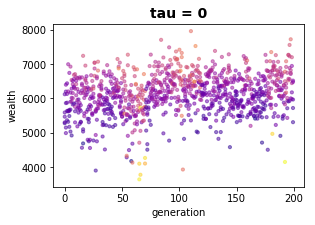

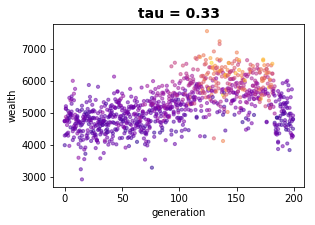

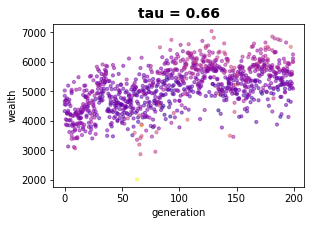

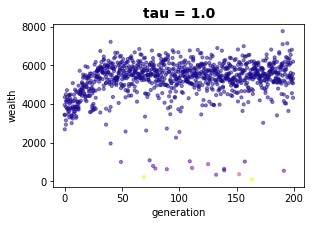

In [222]:
 for tau in [0, 0.33, 0.66, 1.0]:
    plotWealthVsGen(parsed_data[tau_runs[tau]], "tau = " + str(tau))

# Gini index vs. Wealth

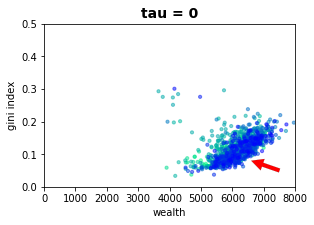

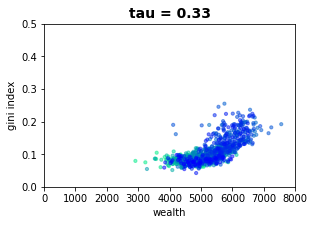

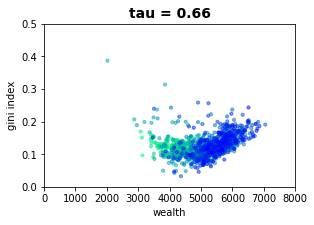

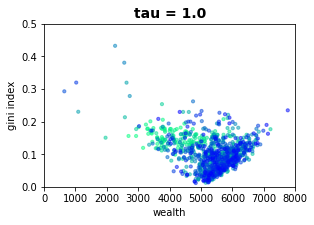

In [276]:
for tau in [0, 0.33, 0.66, 1.0]:
    extra =arrow((7500, 0.05), (6600, 0.08), 'red')  if tau==0 else None
    plotGiniVsWealth(parsed_data[tau_runs[tau]], "tau = " + str(tau), extra)